In [228]:
# import required library
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [229]:
df=pd.read_csv('IMDB-Dataset2.csv')

In [230]:
df.columns=['review_list','review']

In [231]:
# extract data frame
df

,review_list,review
0,This movie was bad from the start. The only pu...,negative
1,"God, I never felt so insulted in my whole life...",negative
2,Not being a fan of the Coen Brothers or George...,positive
3,The movie Andaz Apna Apna in my books is the t...,positive
4,I have to say I was really looking forward on ...,negative
...,...,...
24995,I thought this movie did a down right good job...,positive
24996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
24997,I am a Catholic taught in parochial elementary...,negative
24998,I'm going to have to disagree with the previou...,negative


In [232]:
# shape of dataset
df.shape

(25000, 2)

In [233]:
# getting info abut columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_list  25000 non-null  object
 1   review       25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [234]:
# cheching null values
df.isnull().any()

review_list    False
review         False
dtype: bool

<AxesSubplot:ylabel='review'>

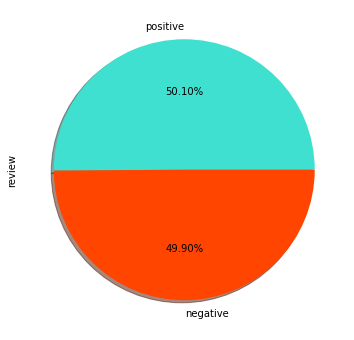

In [235]:
# plot of review counts are equally
df['review'].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=[0,0],shadow=True,colors=['turquoise', 'orangered'],figsize=(6,6))

In [236]:
df['length']=df.review_list.str.len()

In [237]:
df

,review_list,review,length
0,This movie was bad from the start. The only pu...,negative,760
1,"God, I never felt so insulted in my whole life...",negative,1557
2,Not being a fan of the Coen Brothers or George...,positive,1032
3,The movie Andaz Apna Apna in my books is the t...,positive,2762
4,I have to say I was really looking forward on ...,negative,1921
...,...,...,...
24995,I thought this movie did a down right good job...,positive,1008
24996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642
24997,I am a Catholic taught in parochial elementary...,negative,1280
24998,I'm going to have to disagree with the previou...,negative,1234


In [238]:
# convert into lower case of all review
df['review_list']=df.review_list.str.lower()

In [239]:
df

,review_list,review,length
0,this movie was bad from the start. the only pu...,negative,760
1,"god, i never felt so insulted in my whole life...",negative,1557
2,not being a fan of the coen brothers or george...,positive,1032
3,the movie andaz apna apna in my books is the t...,positive,2762
4,i have to say i was really looking forward on ...,negative,1921
...,...,...,...
24995,i thought this movie did a down right good job...,positive,1008
24996,"bad plot, bad dialogue, bad acting, idiotic di...",negative,642
24997,i am a catholic taught in parochial elementary...,negative,1280
24998,i'm going to have to disagree with the previou...,negative,1234


In [240]:
lemma=WordNetLemmatizer()
punct=string.punctuation

In [241]:
# remove punctuation from reviews
df['review_list']=df['review_list'].str.replace('[^\w\s\d\+?]',' ')

# remove regular expression from reviews
df['review_list']=df['review_list'].str.replace('[^a-zA-Z]',' ')

# remove stop words from reviews
df['review_list']=df['review_list'].apply(lambda x:' '.join(word for word in x.split() if word not in set(stopwords.words('english'))))

# remove string punctuation
df['review_list']=df['review_list'].apply(lambda x:' '.join(word for word in x.split() if word not in punct))

# use lemmatizer in review
#df['review_list']=df['review_list'].apply(lambda x:' '.join(lemma.lemmatize(word) for word in x.split()))

In [242]:
# remove html markup <br\> from text
df['review_list']=df['review_list'].str.replace(r"<.*?>",' ')

In [243]:
# remove ",;?/\"
df['review_list']=df['review_list'].str.replace(r"[.;:!\'?,\"()\[\]]",' ')

In [244]:
# encoding the labels
df['review'].replace({'positive':1,'negative':0},inplace=True)

In [245]:
df['length']=df.review_list.str.len()

In [246]:
# after claening the text data
df

,review_list,review,length
0,movie bad start purpose movie angela wanted ge...,0,406
1,god never felt insulted whole life crap many w...,0,901
2,fan coen brothers george clooney anyone see sk...,1,635
3,movie andaz apna apna books top intelligent co...,1,1683
4,say really looking forward watching film findi...,0,1181
...,...,...,...
24995,thought movie right good job creative original...,1,509
24996,bad plot bad dialogue bad acting idiotic direc...,0,409
24997,catholic taught parochial elementary schools n...,0,810
24998,going disagree previous comment side maltin on...,0,821


In [248]:
df['review_list'][0]

'movie bad start purpose movie angela wanted get high body count acting horrible killings acted badly like ally got stuffed toilet guess abandoned cabin end movie comes molly guy cabin see ally angela must gone get part really got black girl angela cabin angela took guitar string chocked one horrible acting two turn around punch bitch molly getting chased angela neigh turn around stab stupid movie sucked'

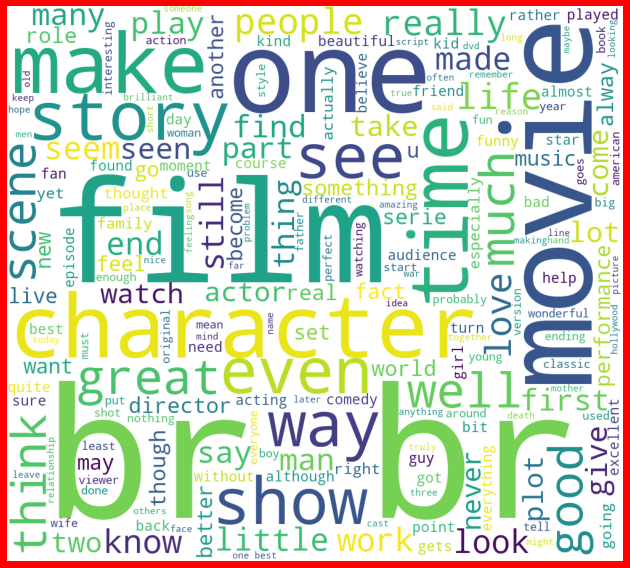

In [267]:
# positive review
from wordcloud import WordCloud
positive=df['review_list'][df['review']==1]
positive_cloud=WordCloud(width=1000,height=900,background_color='white').generate(' '.join(positive))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(positive_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

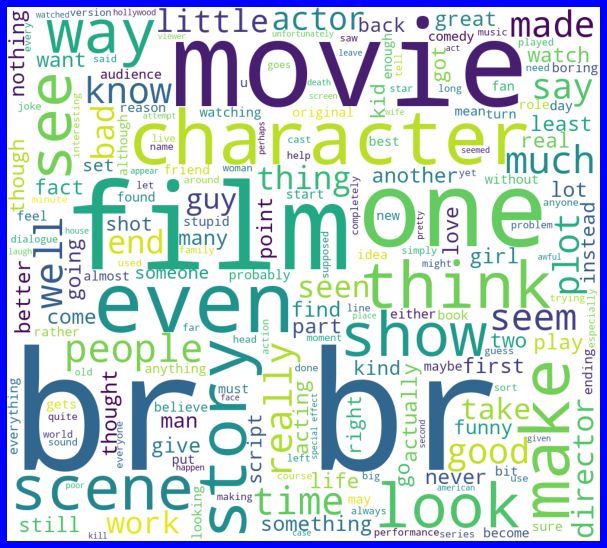

In [268]:
negative=df['review_list'][df['review']==0]
negative_cloud=WordCloud(width=1000,height=900,background_color='white').generate(' '.join(negative))
plt.figure(figsize=(10,8),facecolor='blue')
plt.imshow(negative_cloud)
plt.tight_layout()
plt.axis('off')
plt.show()

In [255]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [279]:
# tfidf and count vectorizer methods
tfd=TfidfVectorizer()
cv=CountVectorizer()
naive=MultinomialNB()
features=tfd.fit_transform(df['review_list'])
x1=features
y1=df['review']

In [280]:
# naive bayes mutinomial classifier by tfidf-vectorizer
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30)
naive.fit(x_train,y_train)
y_pred=naive.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

86.28


In [264]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      3711
           1       0.88      0.84      0.86      3789

    accuracy                           0.86      7500
   macro avg       0.86      0.86      0.86      7500
weighted avg       0.86      0.86      0.86      7500



In [265]:
print(confusion_matrix(y_test,y_pred))

[[3283  428]
 [ 623 3166]]


In [266]:
from sklearn.ensemble import RandomForestClassifier

In [269]:
# by tfidf
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred1=rf.predict(x_test)
print(accuracy_score(y_test,y_pred1)*100)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

85.04
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3711
           1       0.86      0.85      0.85      3789

    accuracy                           0.85      7500
   macro avg       0.85      0.85      0.85      7500
weighted avg       0.85      0.85      0.85      7500

[[3175  536]
 [ 586 3203]]


In [272]:
# by tfidf
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)
pred1=xg.predict(x_test)
print(accuracy_score(y_test,pred1)*100)
print(classification_report(y_test,pred1))
print(confusion_matrix(y_test,pred1))

[16:32:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
85.29333333333334
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      3711
           1       0.84      0.88      0.86      3789

    accuracy                           0.85      7500
   macro avg       0.85      0.85      0.85      7500
weighted avg       0.85      0.85      0.85      7500

[[3072  639]
 [ 464 3325]]


In [273]:
x=cv.fit_transform(df['review_list'])

In [275]:
# naive bayes mutinomial classifier by countvector-vectorizer
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y1,test_size=.30)
naive.fit(x_train1,y_train1)
pred=naive.predict(x_test1)
print(accuracy_score(y_test1,pred)*100)
print(classification_report(y_test1,pred))
print(confusion_matrix(y_test1,pred))

85.68
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      3718
           1       0.88      0.83      0.85      3782

    accuracy                           0.86      7500
   macro avg       0.86      0.86      0.86      7500
weighted avg       0.86      0.86      0.86      7500

[[3289  429]
 [ 645 3137]]


In [277]:
# by count vector
rf=RandomForestClassifier()
rf.fit(x_train1,y_train1)
y_pred1=rf.predict(x_test1)
print(accuracy_score(y_test1,y_pred1)*100)
print(classification_report(y_test1,y_pred1))
print(confusion_matrix(y_test1,y_pred1))

85.56
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      3718
           1       0.86      0.85      0.86      3782

    accuracy                           0.86      7500
   macro avg       0.86      0.86      0.86      7500
weighted avg       0.86      0.86      0.86      7500

[[3189  529]
 [ 554 3228]]


In [278]:
from sklearn.linear_model import LogisticRegression

In [281]:
# by tfidf
lg=LogisticRegression()
lg.fit(x_train,y_train)
pr=lg.predict(x_test)
print(accuracy_score(y_test,pr)*100)
print(classification_report(y_test,pr))
print(confusion_matrix(y_test,pr))

88.57333333333334
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      3765
           1       0.87      0.90      0.89      3735

    accuracy                           0.89      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.89      0.89      0.89      7500

[[3284  481]
 [ 376 3359]]


In [282]:
# by count vector
lg=LogisticRegression()
lg.fit(x_train1,y_train1)
pr1=lg.predict(x_test1)
print(accuracy_score(y_test1,pr1)*100)
print(classification_report(y_test1,pr1))
print(confusion_matrix(y_test1,pr1))

87.42666666666666
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3718
           1       0.87      0.88      0.88      3782

    accuracy                           0.87      7500
   macro avg       0.87      0.87      0.87      7500
weighted avg       0.87      0.87      0.87      7500

[[3242  476]
 [ 467 3315]]


In [283]:
# for positive and negative words in features
feature_to_coef = {
    word: coef for word, coef in zip(
        tfd.get_feature_names(), lg.coef_[0])}

In [284]:
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)

('finest', 1.4795398395001533)
('excellent', 1.4415747432965802)
('wonderfully', 1.37499998481773)
('gem', 1.3646216178438906)
('perfect', 1.318795846155337)


In [285]:
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print (best_negative)

('worst', -2.512240768144346)
('disappointment', -2.2669950289783234)
('waste', -1.9999069727009857)
('awful', -1.8959827400471043)
('dull', -1.7159511268774879)
